### Objective
The copper industry needs machine learning models to improve its sales and pricing decisions. One model is a regression model that can handle skewed and noisy data using data preprocessing and robust algorithms. Another model is a classification model that can identify and rank potential customers using the STATUS variable.

### Getting started

In [1]:
# Importing the required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data
df = pd.read_csv(r'C:\Users\hp\Downloads\Copper_Set.csv',low_memory = False)

## Understanding the data

In [3]:
# Data displaying
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.15113862,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.0248392,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.1279489,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.4110654,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.5262616,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [4]:
 # shape of the data
df.shape

(181673, 14)

In [5]:
# Columns name of the dataset
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [6]:
# number of unique values in the data
df.nunique()

id               181671
item_date           252
quantity tons    181673
customer           1169
country              17
status                9
item type             7
application          30
thickness           594
width              1386
material_ref      16563
product_ref          33
delivery date        28
selling_price      9795
dtype: int64

### Dealing with null and error values

In [7]:
# Null values in dataset
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [8]:
# Droping the row with null values
sub = ['item_date','quantity tons','customer','delivery date','selling_price','country','status','thickness']
for i in sub:
    df = df.dropna(subset=[i])

In [9]:
# Null values after droping the null rows
df.isnull().sum()

id                   2
item_date            0
quantity tons        0
customer             0
country              0
status               0
item type            0
application          0
thickness            0
width                0
material_ref     77887
product_ref          0
delivery date        0
selling_price        0
dtype: int64

In [10]:
# Shape of the dataset after droping the null rows
df.shape

(181638, 14)

In [11]:
# Converting the quantity tons column to numeric
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')

In [12]:
df['quantity tons'] = df['quantity tons'].astype(float)

In [13]:
dfqt = df[df['quantity tons']<=0].index
print(len(dfqt))
df.drop(dfqt,inplace = True)

4


In [14]:
dfsp = df[df['selling_price']<=0].index
print(len(dfsp))
df.drop(dfsp,inplace = True)

7


In [15]:
dft = df[df['thickness']<=0].index
print(len(dft))
df.drop(dft,inplace = True)

0


In [16]:
dfw = df[df['width']<=0].index
print(len(dfw))
df.drop(dfw,inplace = True)

0


### Dealing with format and datatypes of the data

#### Format changing

In [17]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [18]:
# Datatypes of the dataset
df.dtypes

id                object
item_date        float64
quantity tons    float64
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [19]:
# Converting the item_date column from float to date time format
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date

In [20]:
# Converting the quantity tons column to numeric
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')

In [21]:
# Converting the customer column to numeric
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')

In [22]:
# Converting the country column to numeric
df['country'] = pd.to_numeric(df['country'], errors='coerce')

In [23]:
# Converting the application column to numeric
df['application'] = pd.to_numeric(df['application'], errors='coerce')

In [24]:
# Converting the thickness column to numeric
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')

In [25]:
# Converting the width column to numeric
df['width'] = pd.to_numeric(df['width'], errors='coerce')

In [26]:
# Converting the product_ref column to numeric
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')

In [27]:
# Converting the delivery date column to datetime
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date

In [28]:
# Converting the selling_price column to numeric
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

In [29]:
df.head(3)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33


### EDA

In [30]:
df.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
count,1.816260e+05,1.816270e+05,181627.000000,181627.000000,181627.000000,181627.000000,1.816270e+05,1.816270e+05
mean,5.876403e+03,3.023251e+07,44.893887,25.615883,2.550454,1295.264999,4.740132e+08,1.918448e+03
std,2.349379e+06,1.005640e+05,24.404490,17.754217,2.976477,261.649315,7.175316e+08,3.318367e+05
min,1.000000e-05,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,1.000000e-01
25%,1.096907e+01,3.019688e+07,26.000000,10.000000,0.700000,1179.000000,6.119930e+05,6.690000e+02
50%,3.036402e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,8.120000e+02
75%,6.716208e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,9.530000e+02
max,1.000000e+09,3.040818e+07,113.000000,99.000000,400.000000,2990.000000,1.722208e+09,1.000010e+08


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181627 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181625 non-null  object 
 1   item_date      181625 non-null  object 
 2   quantity tons  181626 non-null  float64
 3   customer       181627 non-null  float64
 4   country        181627 non-null  float64
 5   status         181627 non-null  object 
 6   item type      181627 non-null  object 
 7   application    181627 non-null  float64
 8   thickness      181627 non-null  float64
 9   width          181627 non-null  float64
 10  material_ref   103745 non-null  object 
 11  product_ref    181627 non-null  int64  
 12  delivery date  181625 non-null  object 
 13  selling_price  181627 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 20.8+ MB


In [32]:
df.isnull().sum()

id                   2
item_date            2
quantity tons        1
customer             0
country              0
status               0
item type            0
application          0
thickness            0
width                0
material_ref     77882
product_ref          0
delivery date        2
selling_price        0
dtype: int64

In [33]:
df['status'].value_counts()

status
Won                116000
Lost                34432
Not lost for AM     19566
Revised              4276
To be approved       4169
Draft                3120
Offered                53
Offerable              10
Wonderful               1
Name: count, dtype: int64

[None, None, None, None, None, None, None, None, None]

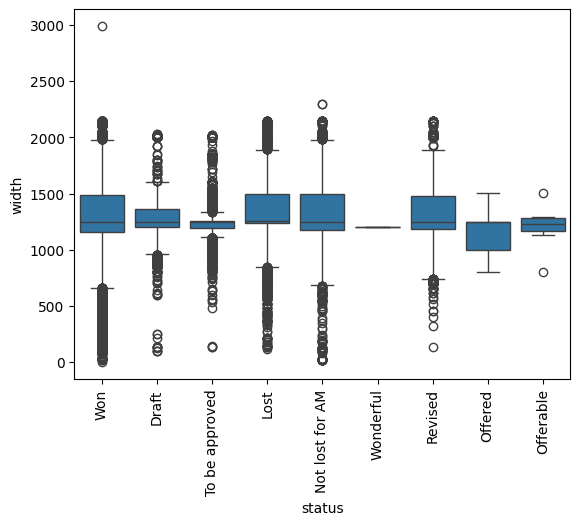

In [34]:
plot = sns.boxplot(x='status',
            y='width',
            data=df)
plt.setp(plot.get_xticklabels(), rotation=90)

[None, None, None, None, None, None, None, None, None]

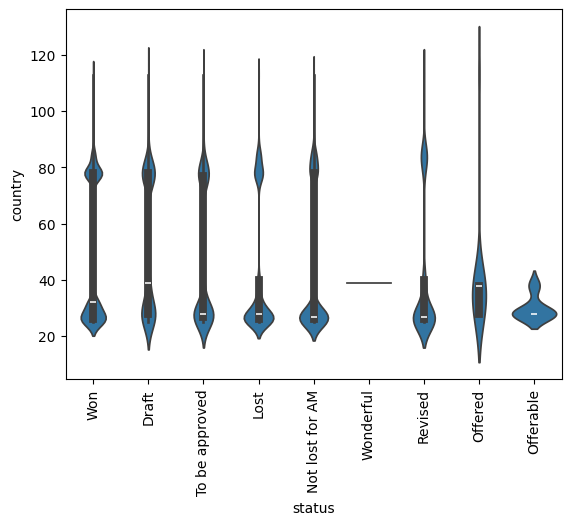

In [35]:
plot = sns.violinplot(x='status',
               y='country',
               data=df)
plt.setp(plot.get_xticklabels(), rotation=90)

[None, None, None, None, None, None, None]

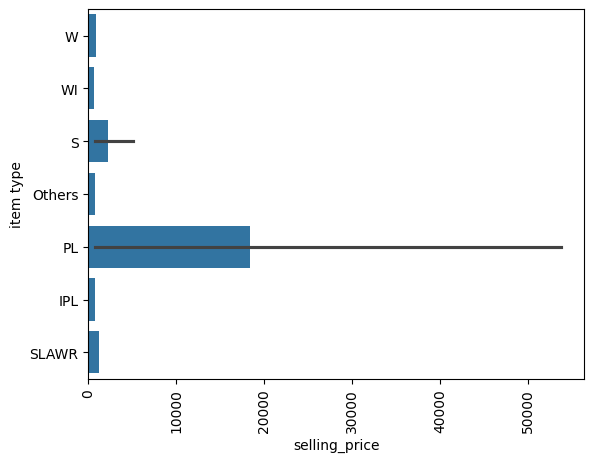

In [36]:
plot = sns.barplot(x='selling_price',
            y='item type',
            data=df)
plt.setp(plot.get_xticklabels(), rotation=90)

### Categorical values

In [37]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

status_code = le.fit_transform(df['status'])
df.insert(loc = 6,
          column = 'status_code',
          value = status_code)

In [38]:
item_type_code = le.fit_transform(df['item type'])
df.insert(loc = 8,
          column = 'type_code',
          value = item_type_code)

In [39]:
df.head(3)

,id,item_date,quantity tons,customer,country,status,status_code,item type,type_code,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,7,W,5,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,7,W,5,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,7,WI,6,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33


<Axes: >

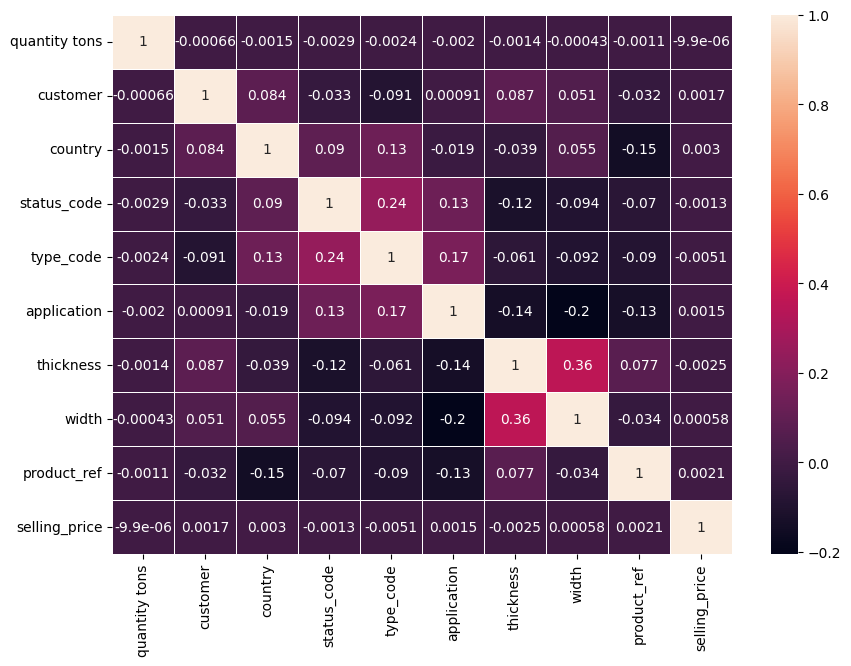

In [40]:
corr_df = df[['quantity tons','customer','country','status_code','type_code','application','thickness','width','product_ref','selling_price']].dropna().corr()
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr_df, annot=True, linewidths=.5, ax=ax)

### Regressor

In [93]:
dfr = df.copy()

In [41]:
dfr.sample(3)

,id,item_date,quantity tons,customer,country,status,status_code,item type,type_code,application,thickness,width,material_ref,product_ref,delivery date,selling_price
49586,FF643A5B-C444-4555-9681-B3377CDF1A18,2021-01-28,5.685429,30160005.0,78.0,Won,7,W,5,41.0,0.50,1246.0,NaN,164141591,2021-04-01,1001.00
76674,43F99DF0-F828-452E-9A12-A2AF91FDFF76,2020-12-15,63.846998,30153510.0,30.0,Won,7,S,3,41.0,0.32,1064.0,LIN1065X32AA,611993,2021-01-01,723.29
38181,F48FFC0C-7DF3-4A30-AD53-6B650DFB5B64,2021-02-16,31.961061,30202938.0,25.0,Won,7,W,5,41.0,1.50,1025.0,0000000000000000000000000000000000101748,164141591,2021-01-01,819.00


In [42]:
dfr = dfr.drop(columns='material_ref')

In [43]:
dfr.head(3)

,id,item_date,quantity tons,customer,country,status,status_code,item type,type_code,application,thickness,width,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,7,W,5,10.0,2.00,1500.0,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,7,W,5,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,7,WI,6,28.0,0.38,952.0,628377,2021-01-01,644.33


In [44]:
dfr.isnull().sum()

id               2
item_date        2
quantity tons    1
customer         0
country          0
status           0
status_code      0
item type        0
type_code        0
application      0
thickness        0
width            0
product_ref      0
delivery date    2
selling_price    0
dtype: int64

In [45]:
dfr = dfr.dropna()

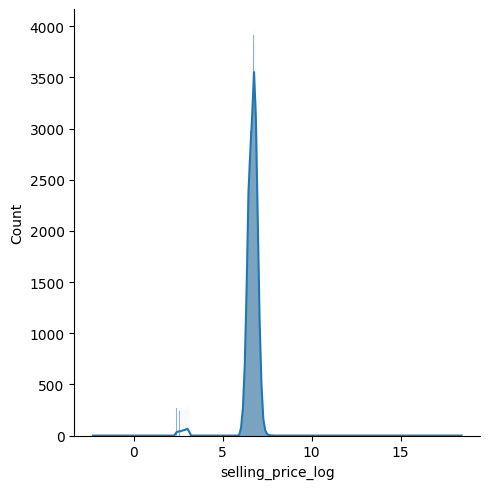

In [96]:
dfr['selling_price_log'] = np.log(dfr['selling_price'])
sns.displot(dfr['selling_price_log'],kde=True)
plt.show()

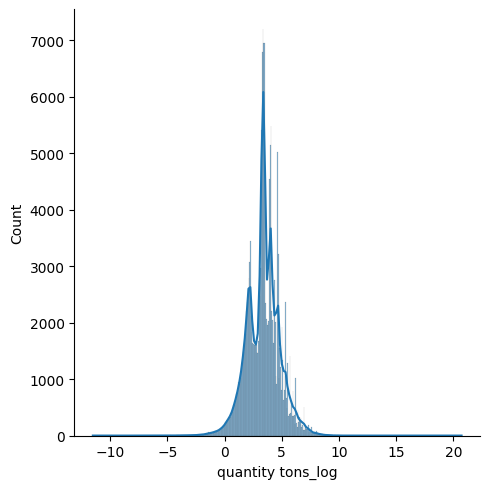

In [94]:
dfr['quantity tons_log'] = np.log(dfr['quantity tons'])
sns.displot(dfr['quantity tons_log'],kde=True)
plt.show()

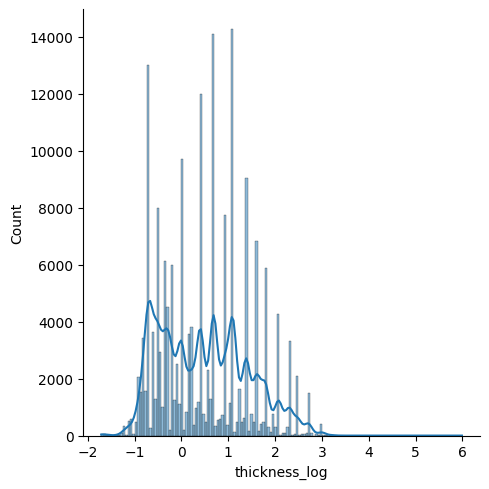

In [95]:
dfr['thickness_log'] = np.log(dfr['thickness'])
sns.displot(dfr['thickness_log'],kde=True)
plt.show()

In [122]:
X = dfr[['quantity tons_log','customer','country','status_code','type_code','application','thickness_log','width','product_ref']]
y = dfr['selling_price_log']

In [123]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS.fit_transform(X)

array([[ 0.41506739, -0.75771563, -0.69225033, ...,  0.22814024,
         0.78245901,  1.66790511],
       [ 2.25042993, -0.29403459, -0.81517858, ..., -0.75339772,
        -0.32589119,  1.66498251],
       [ 1.77453529, -0.78103392, -0.61029817, ..., -1.55084831,
        -1.31194068, -0.65974878],
       ...,
       [ 1.34669579, -0.31475754, -0.81517858, ..., -0.56931035,
         0.78245901, -0.43186654],
       [-1.34846834, -0.31475754, -0.81517858, ..., -0.88124292,
        -0.1730153 , -0.43186654],
       [ 1.81043496, -0.31475754, -0.81517858, ..., -0.88124292,
        -0.21123427, -0.43186654]])

In [124]:
# Splitting the data
# Importing the split
from sklearn.model_selection import train_test_split

# Objecting the split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

#### Linear regression

In [125]:
# Create a regressor
from sklearn.linear_model import LinearRegression

# Create a regressor object
lin_reg = LinearRegression()

# fit the model with X-train and y_train data
lin_reg.fit(X_train,y_train)

LinearRegression()

In [126]:
# Accuracy score of the model
train_score = lin_reg.score(X_train,y_train)
print('Train score:',train_score*100)

Test set score: 8.473551926796997


In [127]:
# Accuracy score of the model
test_score = lin_reg.score(X_test,y_test)
print('Test score:',(test_score*100))

Test set score: 8.118984361892402


#### DecisionTree Regression

In [56]:
# import the regressor 
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
Dt_reg = DecisionTreeRegressor(random_state = 0)  
  
# fit the model with X-train and y_train data 
Dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [57]:
# Accuracy of the model
score = Dt_reg.score(X_train,y_train)
print('Train_score:',score * 100,"%")

Train_score: 100.0 %


In [58]:
# Accuracy of the model
score = Dt_reg.score(X_test,y_test)
print('Test_score:',score * 100,"%")

Test_score: 88.12399834403458 %


#### RandomForest Regressor

In [59]:
# Create a regressor
from sklearn.ensemble import RandomForestRegressor

# Create a regressor object
rf_reg = RandomForestRegressor(n_estimators=100, random_state=0)

# fit the model with X-train and y_train data
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [60]:
# Accuracy of the model
score = rf_reg.score(X_train,y_train)
print('Train Score:',score * 100,"%")

Train Score: 98.96127909247254 %


In [61]:
# Accuracy of the model
score = rf_reg.score(X_test,y_test)
print('Test Score:',score * 100,"%")

Test Score: 93.06822378182413 %


#### GradientBoosting Regressor

In [62]:
# Importing the model
from sklearn.ensemble import GradientBoostingRegressor
# Objecting the model
gbr = GradientBoostingRegressor(n_estimators = 10, learning_rate = 0.1, random_state =42)
# Train with dataset
gbr.fit(X_train,y_train)

GradientBoostingRegressor(n_estimators=10, random_state=42)

In [63]:
# Train score
score = gbr.score(X_train,y_train)
print('Train score:',score*100,'%')

Train score: 76.64613319150035 %


In [64]:
# Test score
score = gbr.score(X_test,y_test)
print('Test score:',score*100,'%')

Test score: 76.59180799053323 %


#### Decision tree regressor with GridsearchCV

In [65]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
dtr = DecisionTreeRegressor()
# hyperparameters
param_grid = {'max_depth': [2, 5, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['auto', 'sqrt', 'log2']}
# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 6

Best hyperparameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2}


In [66]:
# Predict train and test data for valuating
y_test_pred = best_model.predict(X_test)
y_train_pred = best_model.predict(X_train)

In [67]:
# Check metrics 
#R2 Score
print('Train score:',(metrics.r2_score(y_train,y_train_pred))*100,'%')

Train score: 93.68431853583942 %


In [68]:
# Test score
print('Test score:',(metrics.r2_score(y_test,y_test_pred))*100,'%')

Test score: 90.48189325399163 %


In [69]:
# # Importing the pickle package 
# import pickle
# # Pickling the trained model knowledge
# with open("copper_regressor_pkl","wb") as files:
#   pickle.dump(rf_reg, files)

### Classifier

In [47]:
# Shape of dataframe
df.shape

(181627, 16)

In [48]:
# Making a copy for classification
dfc = df.copy()

In [49]:
# Just setting the records with only won and lost status
dfc = df[df['status'].isin(['Won', 'Lost'])]

In [50]:
# Shape of the dataframe
dfc.shape

(150432, 16)

In [51]:
# Encoding the categorical values
status_code = le.fit_transform(dfc['status'])
# Inserting the encoded values next to the actual column
dfc.insert(loc = 6,
          column = 'status_classcode',
          value = status_code)

In [52]:
# A flash of data
dfc.head(3)

,id,item_date,quantity tons,customer,country,status,status_classcode,status_code,item type,type_code,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,1,7,W,5,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,1,7,W,5,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,1,7,WI,6,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33


In [53]:
# Droping the material_ref column
dfc = dfc.drop(columns='material_ref')

In [54]:
# Checking for null values
dfc.isnull().sum()

id                  1
item_date           2
quantity tons       1
customer            0
country             0
status              0
status_classcode    0
status_code         0
item type           0
type_code           0
application         0
thickness           0
width               0
product_ref         0
delivery date       1
selling_price       0
dtype: int64

In [55]:
# Droping the null values 
dfc = dfc.dropna()

<Axes: >

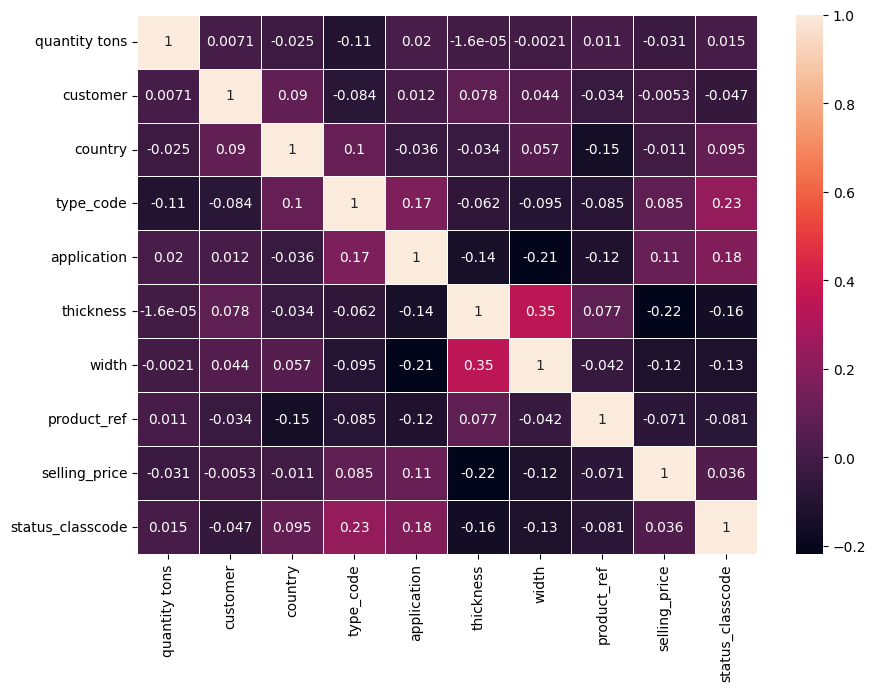

In [100]:
corr=dfc[['quantity tons','customer','country','type_code','application','thickness','width','product_ref','selling_price','status_classcode']].dropna().corr()
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)

[None, None]

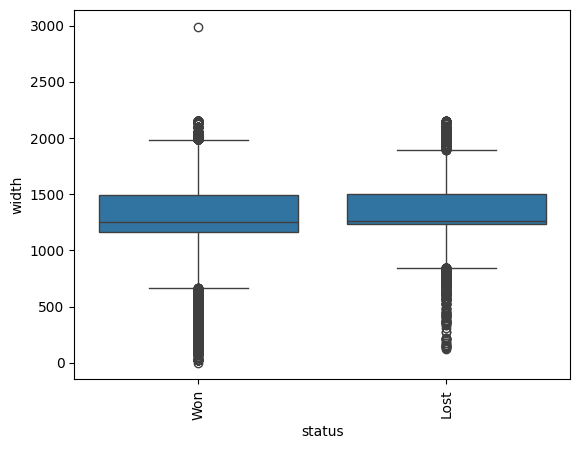

In [57]:
plot = sns.boxplot(x='status',
            y='width',
            data=dfc)
plt.setp(plot.get_xticklabels(), rotation=90)

[None, None]

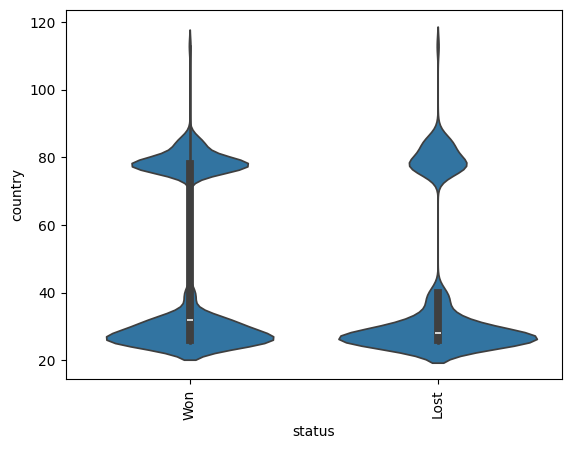

In [58]:
plot = sns.violinplot(x='status',
            y='country',
            data=dfc)
plt.setp(plot.get_xticklabels(), rotation=90)

Country of code 28 roughly has more order, which may have more customers or outlets

[None, None]

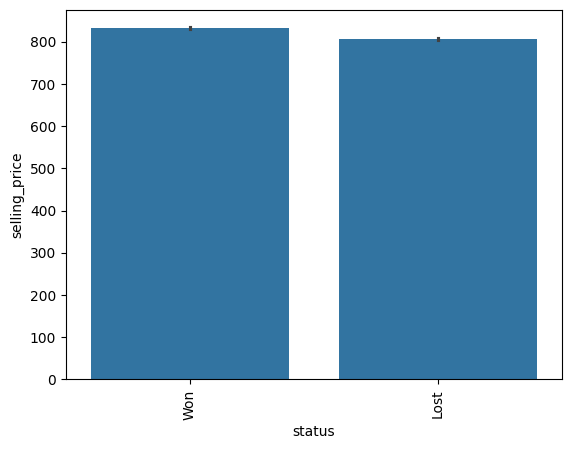

In [98]:
plot = sns.barplot(x='status',
            y='selling_price',
            data=dfc)
plt.setp(plot.get_xticklabels(), rotation=90)

In [101]:
# Assigning the values
X = dfc[['quantity tons','customer','country','type_code','application','thickness','width','product_ref','selling_price']].dropna()
y = dfc['status_classcode']

In [102]:
# Objecting the split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

In [103]:
# Scaling the features
SS.fit_transform(X)

array([[-0.09143656, -0.7250777 , -0.71019357, ...,  0.75951335,
         1.66740264,  0.09692364],
       [ 1.52759497, -0.2835577 , -0.83270143, ..., -0.33002424,
         1.66447894,  0.76065707],
       [ 0.66147103, -0.74728153, -0.62852166, ..., -1.29933699,
        -0.66113486, -0.62413849],
       ...,
       [ 0.25768143, -0.30329023, -0.83270143, ...,  0.75951335,
        -0.43316611, -0.8144202 ],
       [-0.20464264, -0.30329023, -0.83270143, ..., -0.17974319,
        -0.43316611, -0.7112492 ],
       [ 0.70809693, -0.30329023, -0.83270143, ..., -0.21731345,
        -0.43316611, -0.7525176 ]])

In [104]:
# Checking the status values
activity_count = y.value_counts()
activity_count

status_classcode
1    115996
0     34431
Name: count, dtype: int64

<Axes: ylabel='count'>

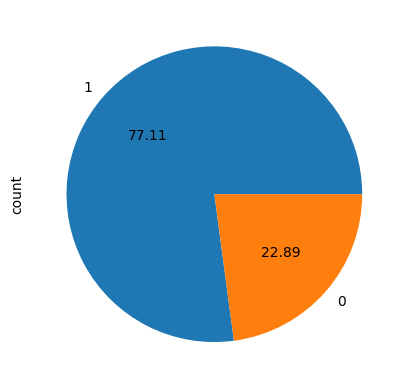

In [105]:
# Show pie plot 
y.value_counts().plot.pie(autopct='%.2f')

#### Logistic Regression

In [106]:
# Create a regressor
from sklearn.linear_model import LogisticRegression

# Create a regressor object
lr = LogisticRegression(max_iter=100)

# fit the model with X-train and y_train data
lr.fit(X_train,y_train)

LogisticRegression()

In [107]:
# Predicting the test and train data for valuating
y_test_predict = lr.predict(X_test)
y_train_predict = lr.predict(X_train)

In [108]:
# Importing accuracy score package
from sklearn.metrics import accuracy_score
print('Train score:',(accuracy_score(y_train,y_train_predict))*100)
print('Test score:',(accuracy_score(y_test,y_test_predict))*100)

Train score: 77.1258713365876
Test score: 77.07682421502803


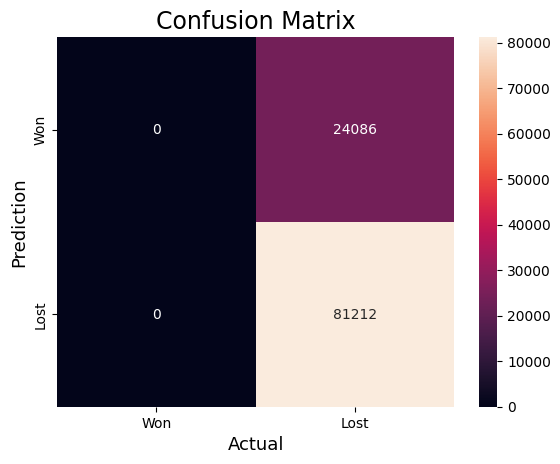

In [109]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train,y_train_predict )
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Won','Lost'],
            yticklabels=['Won','Lost'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

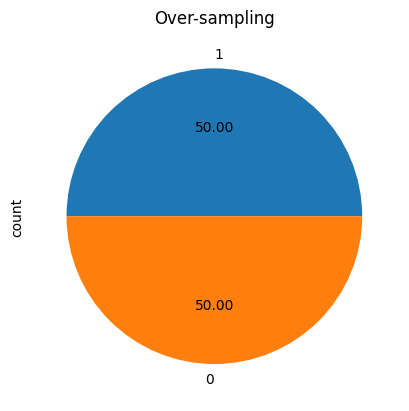

In [110]:
# Importing the oversampling package
from imblearn.over_sampling import RandomOverSampler
# Objectifying the library
ros = RandomOverSampler(sampling_strategy=1) # Float
#ros = RandomOverSampler(sampling_strategy="not majority") # String
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

ax = y_train_ros.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Over-sampling")

In [89]:
# Checking the oversampled data
y_train_ros.value_counts()

status_classcode
1    81212
0    81212
Name: count, dtype: int64

In [90]:
# fit the model with X-train and y_train data
lr.fit(X_train_ros,y_train_ros)

LogisticRegression()

In [91]:
# Predicting the test and train data for valuating
y_test_predict = lr.predict(X_test)
y_train_predict = lr.predict(X_train)

In [92]:
# Printing the score
print('Train score:',(accuracy_score(y_train,y_train_predict))*100)
print('Test score:',(accuracy_score(y_test,y_test_predict))*100)

Train score: 65.34407111246178
Test score: 65.23743047707681


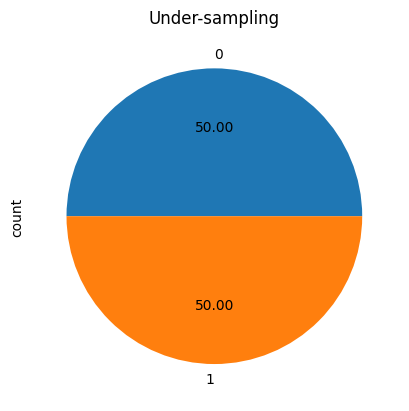

In [93]:
# Importing undersampling package
from imblearn.under_sampling import RandomUnderSampler
# Objectifying the package
rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
# rus = RandomUnderSampler(sampling_strategy="not minority") # String
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

ax = y_train_rus.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [94]:
# Checking the undersampled data values
y_train_rus.value_counts()

status_classcode
0    24086
1    24086
Name: count, dtype: int64

In [95]:
# Training the model with undersampled data
lr.fit(X_train_rus,y_train_rus)

LogisticRegression()

In [96]:
# Predicting the test and train data for valuating
y_test_predict = lr.predict(X_test)
y_train_predict = lr.predict(X_train)

In [97]:
# Printing the accuracy score
print('Train score:',(accuracy_score(y_train,y_train_predict))*100)
print('Test score:',(accuracy_score(y_test,y_test_predict))*100)

Train score: 65.34407111246178
Test score: 65.23743047707681


#### KMeans

In [111]:
# Importing the KMeans model
from sklearn.cluster import KMeans
# Objectifying the model
km = KMeans(n_clusters = 2, random_state=21)
# Training the model with trained data
km.fit(X_train,y_train)

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=21)

In [112]:
# Importing metrices
from sklearn import metrics
score = metrics.accuracy_score(y_train,km.predict(X_train))
print('Train Score',score*100)
score = metrics.accuracy_score(y_test,km.predict(X_test))
print('Test Score',score*100)

Train Score 34.65687857319227
Test Score 34.76256952292317


In [113]:
y_test_predict=km.predict(X_test)

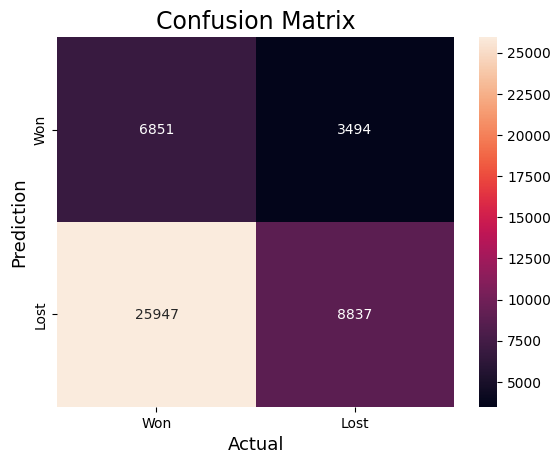

In [114]:
cm = confusion_matrix(y_test,y_test_predict )
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Won','Lost'],
            yticklabels=['Won','Lost'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

#### Kneighbours Classifier

In [115]:
# Importing KNeighbors classifier model
from sklearn.neighbors import KNeighborsClassifier
k=2
# Objectifying the model
knn= KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
knn

KNeighborsClassifier(n_neighbors=2)

In [116]:
# Predicting the test and train data for valuating
y_test_predict = knn.predict(X_test)
y_train_predict = knn.predict(X_train)

In [117]:
# Printing the accuracy score
print('Train score:',(accuracy_score(y_train,y_train_predict)*100))
print('Test score:',(accuracy_score(y_test,y_test_predict)*100))

Train score: 95.61435164960398
Test score: 89.42365219703517


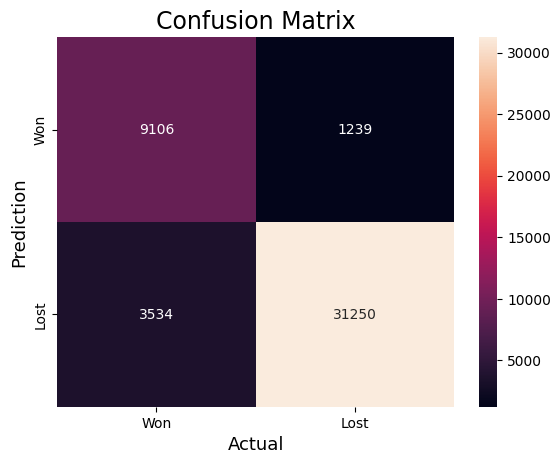

In [118]:
cm = confusion_matrix(y_test,y_test_predict )
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Won','Lost'],
            yticklabels=['Won','Lost'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

#### Decision Tree classifier

In [119]:
# Importing the Decisiontree classifier model
from sklearn.tree import DecisionTreeClassifier
# Objectifying the model
dtc = DecisionTreeClassifier(max_depth=4)
# Training the model
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [120]:
# Predicting the test and train data for valuating
y_test_predict = dtc.predict(X_test)
y_train_predict = dtc.predict(X_train)

In [121]:
# Printing the accuracy score
print('Train score:',(accuracy_score(y_train,y_train_predict)*100))
print('Test score:',(accuracy_score(y_test,y_test_predict)*100))

Train score: 79.68337480294024
Test score: 79.60734782512353


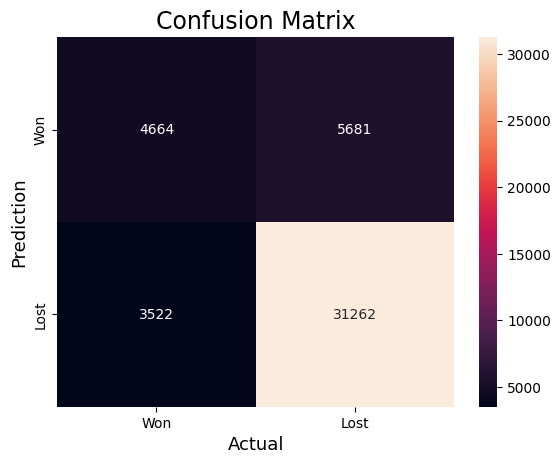

In [122]:
cm = confusion_matrix(y_test,y_test_predict )
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Won','Lost'],
            yticklabels=['Won','Lost'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

#### Random forest classifier

In [123]:
# Importing the RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier
# instantiate the classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
# fit the model
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [124]:
# Predicting the test and train data for valuating
y_test_predict = rfc.predict(X_test)
y_train_predict = rfc.predict(X_train)

In [125]:
# Printing the accuracy score
print('Train score:',(accuracy_score(y_train,y_train_predict))*100)
print('Test score:',(accuracy_score(y_test,y_test_predict))*100)

Train score: 100.0
Test score: 93.50971659021916


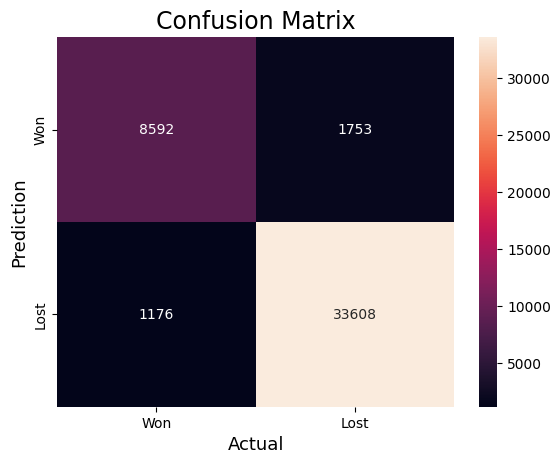

In [126]:
cm = confusion_matrix(y_test,y_test_predict )
sns.heatmap(cm, 
            annot=True,
            fmt='g', 
            xticklabels=['Won','Lost'],
            yticklabels=['Won','Lost'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [109]:
# Tried for predicting a value
rfc.predict([[54.151139,30156308.0,28.0,7,5,10.0,2.00,1500.0,1670798778,854.00]])

C:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [128]:
# Pickling the trained model knowledge
with open("copper_classifier_pkl","wb") as files:
  pickle.dump(rfc, files)

In [42]:
df.to_csv('copperdf.csv',index=False)

### Features and targets
1. `quantity tons`: This column indicates the quantity of the item in tons, which is
essential for inventory management and understanding the volume of products sold or
produced.
2. `customer`: The "customer" column refers to the name or identifier of the customer
who either purchased or ordered the items. It's crucial for maintaining customer
relationships and tracking sales.
3. `country`: The "country" column specifies the country associated with each
customer. This information can be useful for understanding the geographic distribution
of customers and may have implications for logistics and international sales.
4. `status`: The "status" column likely describes the current status of the transaction
or item. This information can be used to track the progress of orders or transactions,
such as "Draft" or "Won."
5. `item type`: This column categorizes the type or category of the items being sold or
produced. Understanding item types is essential for inventory categorization and
business reporting.
6. `application`: The "application" column defines the specific use or application of
the items. This information can help tailor marketing and product development efforts.
7. `thickness`: The "thickness" column provides details about the thickness of the
items. It's critical when dealing with materials where thickness is a significant factor,
such as metals or construction materials.
8. `width`: The "width" column specifies the width of the items. It's important for
understanding the size and dimensions of the products.
9. `product_ref`: The "product_ref" column seems to be a reference or identifier for
the specific product. This information is useful for identifying and cataloging products
in a standardized wa
10. `selling_price`: The "selling_price" column represents the price at which the items
are sold. This is a critical factor for revenue generation and profitability analysisy.